In [1]:
import os
import sys
import warnings
from datasets import DatasetDict

# zeige keine Warnungen an
warnings.filterwarnings("ignore")

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.dataloader import DataLoader

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# DataDownloader erstellen
data_downloader = DataLoader(
    dataset_name="maveriq/tobacco3482",
    save_path="../data/interim"
)

In [ ]:
# Datensatz downloaden und bereinigen
data_downloader.load_and_preprocess()

In [2]:
dataset = DatasetDict.load_from_disk("../data/interim")

In [3]:
dataset["train"].features

{'image': Image(decode=True, id=None),
 'doc_category': Value(dtype='string', id=None)}

In [4]:
dataset["train"][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2560x3281>,
 'doc_category': 'Memo'}

In [5]:
from datasets import DatasetDict, concatenate_datasets

def add_rgb_image(batch):
    # Wenn der Batch eine Liste ist, dann jedes Bild in der Liste umwandeln
    if isinstance(batch['image'], list):
        batch['image'] = [img.convert("RGB") for img in batch['image']]
    else:
        batch['image'] = batch['image'].convert("RGB")
    return batch
    
# Verarbeiten in Chargen
batch_size = 50  # Größe der Chargen, anpassen je nach verfügbarem Speicher
for split in dataset.keys():
    num_examples = len(dataset[split])
    updated_splits = []
    for i in range(0, num_examples, batch_size):
        batch = dataset[split].select(range(i, min(i + batch_size, num_examples)))
        updated_batch = batch.map(add_rgb_image, batched=True, batch_size=batch_size, num_proc=4)  # num_proc für parallele Verarbeitung
        updated_splits.append(updated_batch)
    dataset[split] = concatenate_datasets(updated_splits)

Map (num_proc=4): 100%|██████████| 23/23 [00:03<00:00,  6.19 examples/s]


In [6]:
test_image = dataset["train"][0]["image"]
test_image.mode

'RGB'

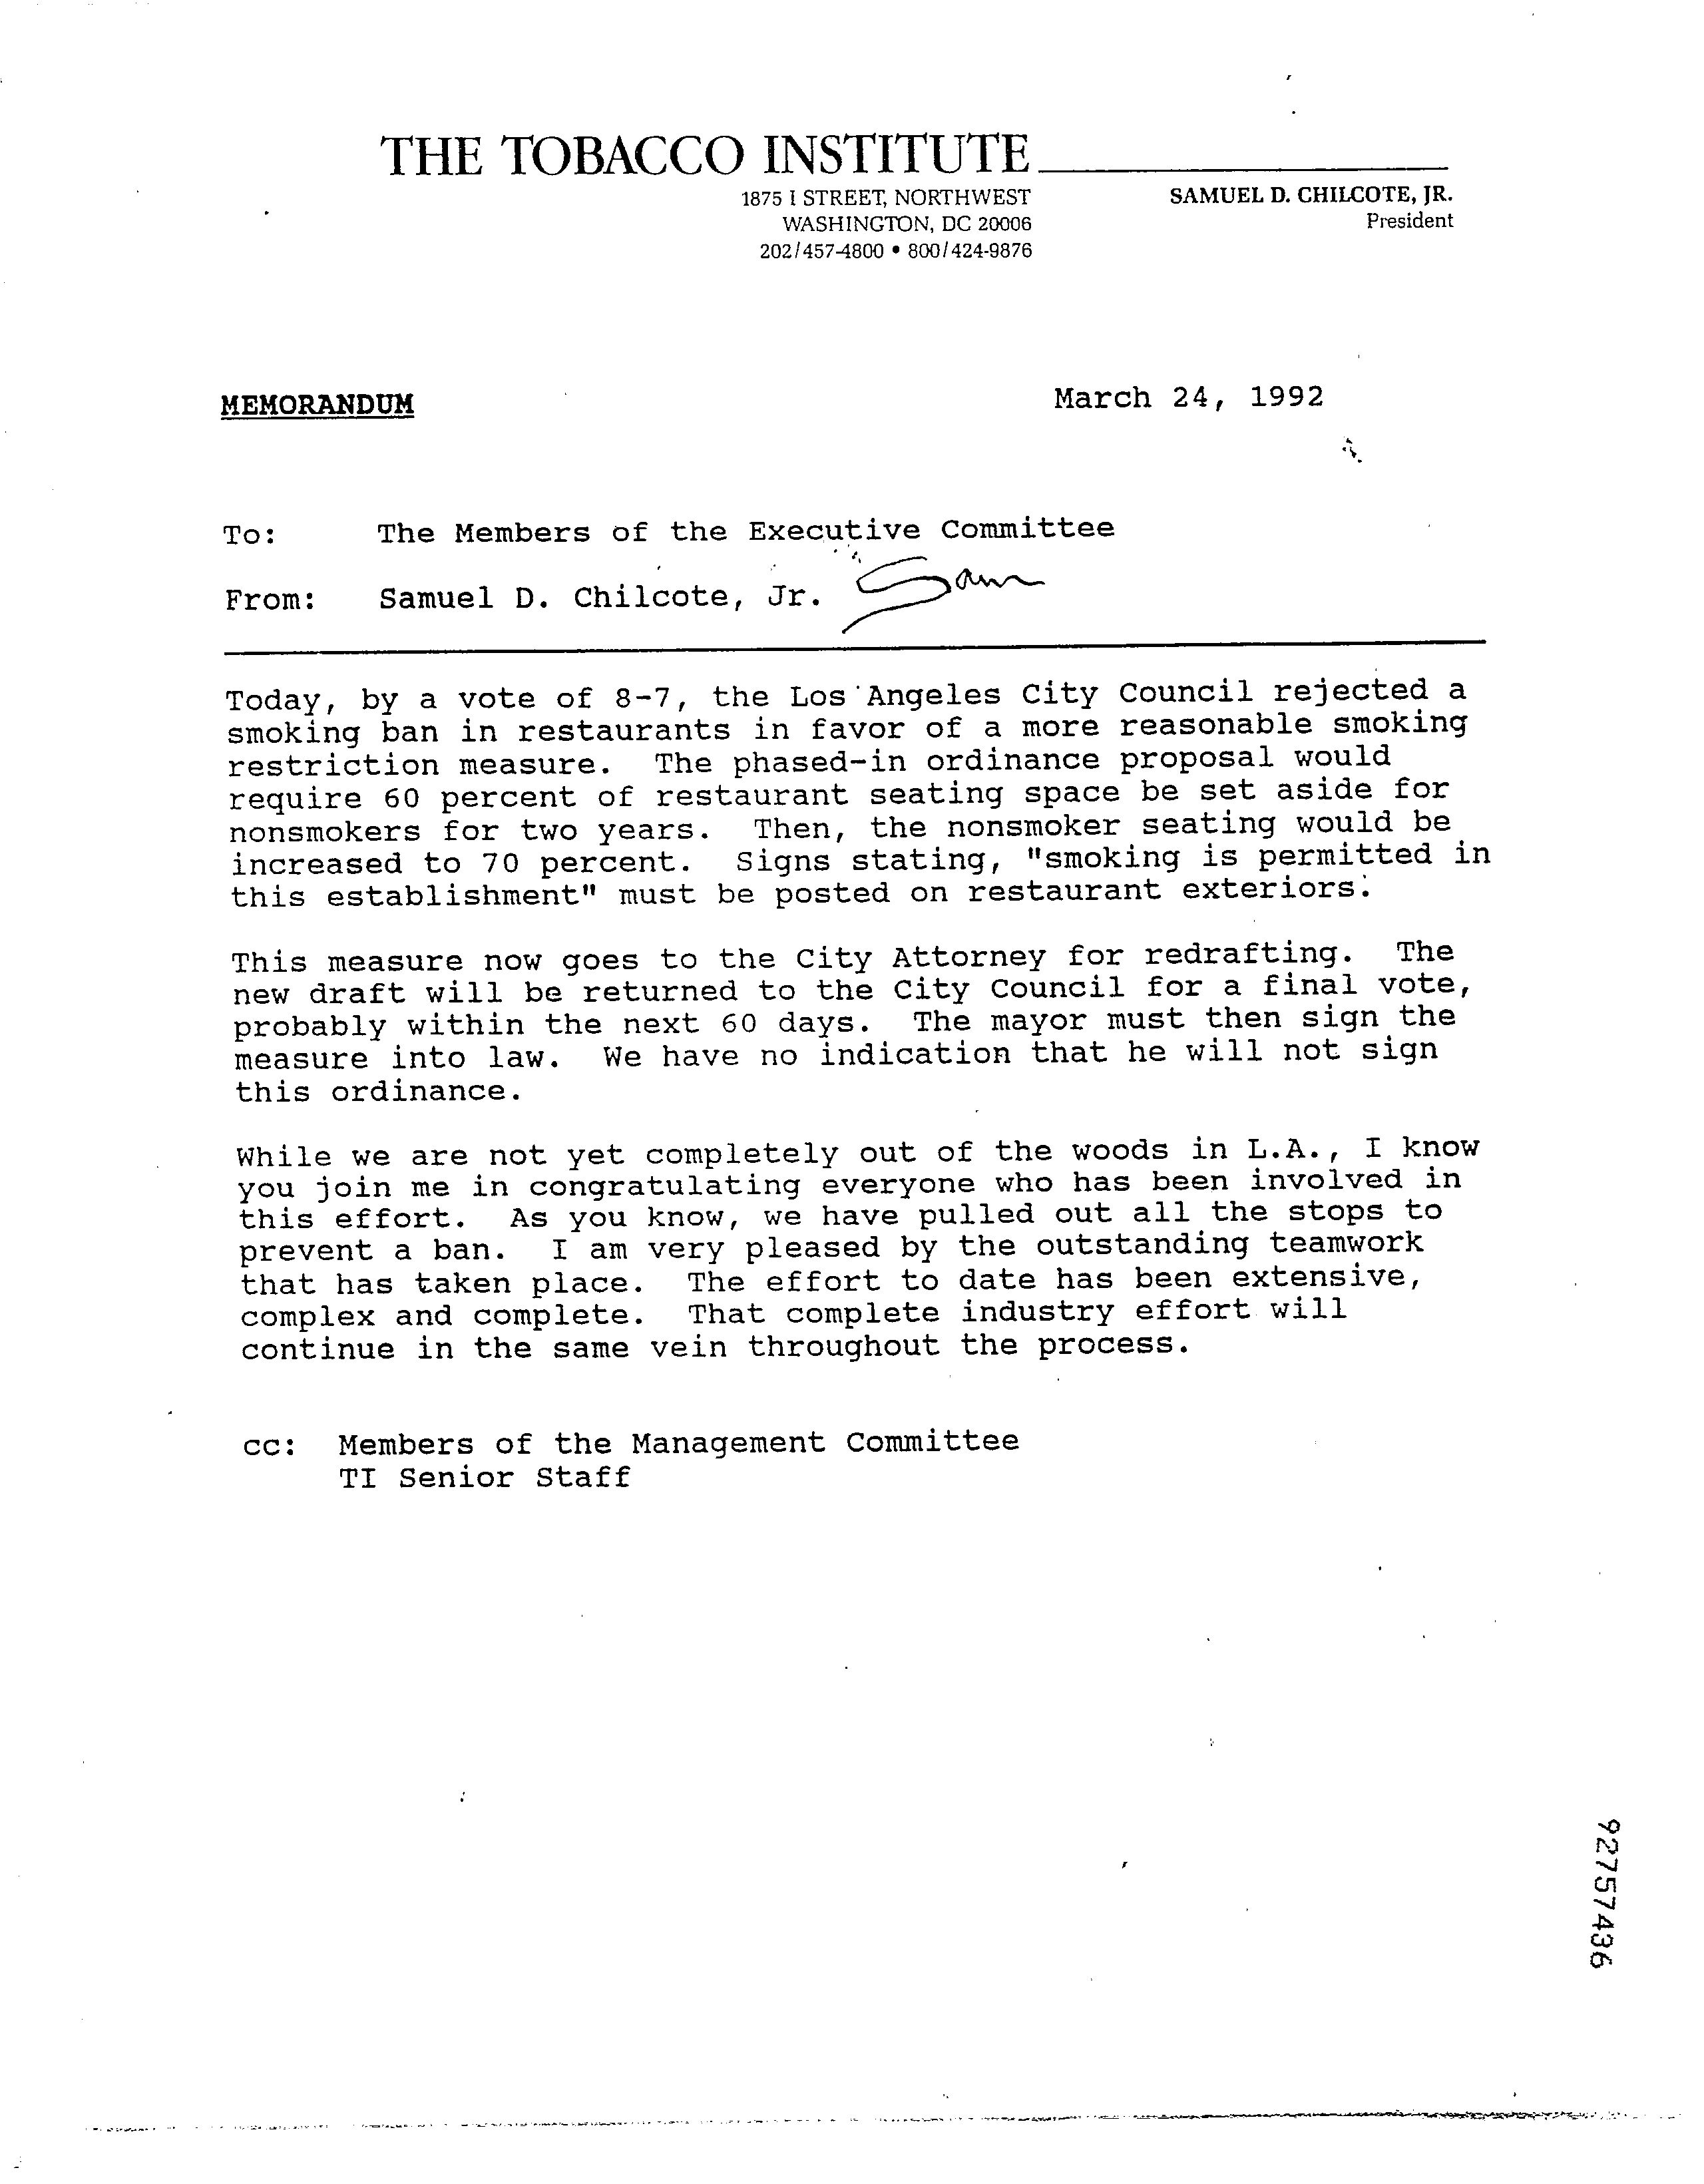

In [7]:
test_image

In [8]:
dataset.save_to_disk("../data/interim_rgb")

Saving the dataset (1/1 shards): 100%|██████████| 523/523 [00:03<00:00, 138.35 examples/s]
